<a href="https://colab.research.google.com/github/marcellapbp/AnaliseEnem2019/blob/main/3_Tend%C3%AAncias_Centrais_Medidas_Variabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tendências Centrais e Medidas de Variabilidade
Para o estudo das Tendências Centrais e Medidas de Variabilidade, que são conceitos estatísticos que nos ajudam a descrever e resumir os dados, foi escolhido a informação da idade dos alunos inscritos no Enem 2019 por ser uma informação mais concreta e de comum conhecimento facilitando a compreensão dos conceitos.

**Fonte de Apoio:**
<br>Data Science From Scratch (Capítulo 5 Statistics)
<br>Curso da Analytics Vidhya Path to Become Data Scientist in 2020 (Aula Variability)


---

Importando bibliotecas

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import variation

Conferindo os dados

In [2]:
df = pd.read_csv('/content/MICRODADOS_ENEM_2019_SP.csv')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEACECDBADBEABAAEAEACAAAECBEEEBACACCDEDACADCB,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7.0,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B
1,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,B,B,4.0,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,A
2,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABABABBCBAEEEBCACACAEDBCCAEBEABEADBAEACCB,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6.0,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A
3,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,AC.BECDABAECBCBBEAACA.EDCDEAEAADCEABDAAACEBCC,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4.0,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B
4,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3.0,C,A,B,C,A,B,B,A,A,A,B,A,A,A,A,A,C,B,B,B


Uma forma rápida de ver alguns dados estatísticos é com a função `describe()`.
<br>
Nela temos a média, desvio padrão, quartis, e mínimo e máximo, no entanto o objetivo desse notebook é fazer um estudo mais aprofundado desses conceitos fundamentais estatísticos.

In [3]:
df.NU_IDADE.describe()

count    19335.000000
mean        21.493095
std          6.630445
min         14.000000
25%         17.000000
50%         19.000000
75%         23.000000
max         72.000000
Name: NU_IDADE, dtype: float64



---


## Tendências Centrais

As Tendências Centrais são composta por:


1.   Moda

> é o valor que mais se repete na sequência


2.   Média


> é a soma de todos os números dividido pela quantidade de elementos


3.   Mediana


> é o número do meio de uma lista ordenada, caso a quatidade de elementos seja par é feito a média dos dois elementos medianos



Moda:     [17]
Média:    21.493095422808377
Mediana:  19.0


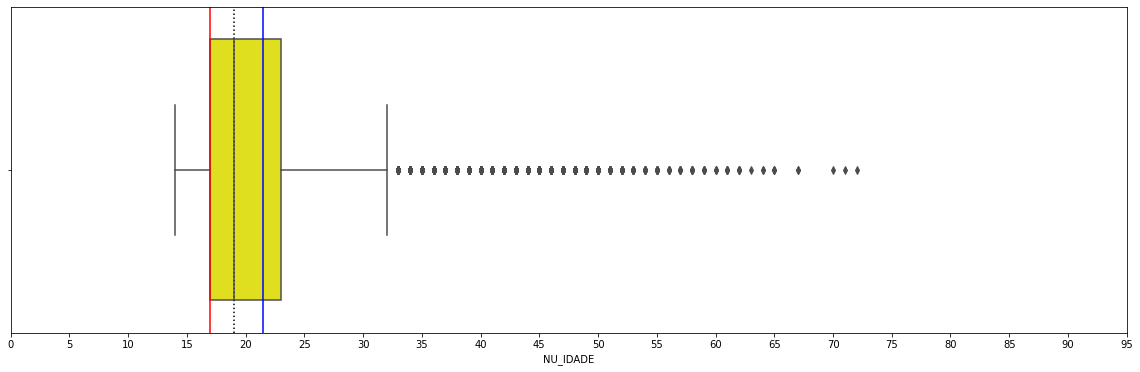

In [5]:
#ajustando tamanho do gráfico
plt.figure(figsize=(20,6))
#criando boxplot
sns.boxplot(x=df.NU_IDADE, color='yellow')

#calculando as Tendências Centrais
moda    = df.NU_IDADE.mode().unique()
media   = df.NU_IDADE.mean()
mediana = df.NU_IDADE.median()

#imprimindo valores das Tendências Centrais
print(f'Moda:     {moda}')
print(f'Média:    {media}')
print(f'Mediana:  {mediana}')

#adicionando Tendências Centrais ao gráfico já plotado
plt.axvline(x=moda,     color='red')
plt.axvline(x=media,    color='blue')
plt.axvline(x=mediana,  color='black', linestyle=':') #medina coincidiu com 50%

#mudando a escala de x para facilitar enxergar a concentração de idade por volta dos 20 anos
plt.xticks(ticks=range(0,100,5));

São conceitos que resumem os dados em um único valor e são muito úteis para entender um pouco do seu comportamento sem precisar olhar um a um, em alguns casos o volume é tão grande que isso não é possível. No entanto não podemos nos limitar a esses valores já que eles não nos contam tudo sobre os dados. Podemos ter situações onde os dados são muito similares ou muito divergentes e ainda assim as tendências centrais apresentam resultados similares. Para isso temos as Medidas de Variabilidade.



---


## Medidas de Variabilidade
Com as Medidas de Variabilidade conseguimos entender a dispersão dos dados, se eles são muito variados ou muito similares. Existem vários cálculos, cada um com seus prós e contras, nesse notebook teremos os seguintes cálculos:


1.   Amplitude (Range)
2.   Desvio Absoluto Médio (Mean Absolute Deviation (MAD))
3.   Variância (Variance)
4.   Desvio Padrão (Standard Deviation (STD))
5.   Coeficiente de Variação (Coefficient of Variation)



**Amplitude (Range)**
<br>
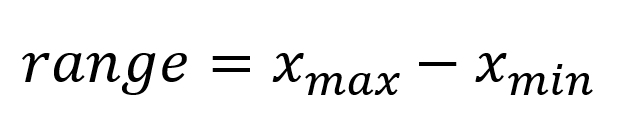

O grande ponto positivo dessa fórmula com certeza é sua simplicidade. Por outro lado está longe de ser perfeita, uma vez que apenas utiliza os valores extremos da lista ignorando todo o resto. Outliers nesse caso causariam grande impacto.

In [7]:
def data_range(data):
  '''
    Calcular a Medida de Variabilidade Range
  '''
  range = max(data) - min(data) 
  print(f'Mínimo = {min(data)}')
  print(f'Máximo = {max(data)}')
  print(f'Range  = {range}')
  return range

Se considerarmos todas as idades do dataset o resultado foi de 58, no entanto se eliminarmos os outliers conforme o boxplot acima nos mostrou, o valor cai para 18. O nosso resultado teve uma diferença de 40, algo bem significante.

In [8]:
data_range(df.NU_IDADE)

Mínimo = 14
Máximo = 72
Range  = 58


58

In [9]:
data_range(df[df.NU_IDADE < 33].NU_IDADE)

Mínimo = 14
Máximo = 32
Range  = 18


18

**Desvio Absoluto Médio (Mean Absolute Deviation (MAD))**
<br>
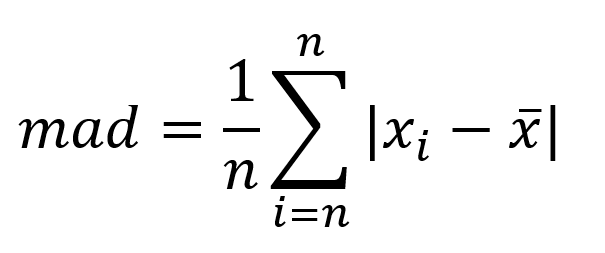

Ter valores dispersos no dataset, poderia ser dito como ter valores que desviam da média:

media.PNG **-> média**
<br>
elemento.PNG**-> cada elemento da lista**
<br>
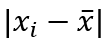**-> diferença entre cada elemento e a média, no entanto convertido em valor absoluto <br>(sem o valor absoluto, o resultado de vários valores positivos e negativos se anulam atrapalhando o resultado)**
<br>
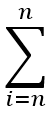**-> é somado o resultado anterior para cada elemento**
<br>
dividido.PNG**->e por fim dividido pela quantidade de elementos**

In [ ]:
df.NU_IDADE.mad()

4.734933204978034

In [28]:
print(f'A variação média da idade dos inscritos é de {df.NU_IDADE.mad()}')  

A variação média da idade dos inscritos é de 4.629875638044762


**Variância (Variance)**
<br>
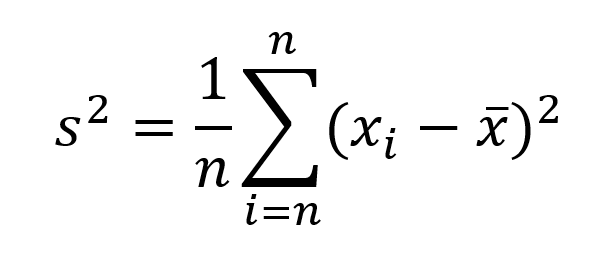

A grande diferença desse cálculo para o anterior, é que calcular o absoluto pode influenciar negativamente no resultado, e uma forma de resolver isso é calculando o quadrado do resultado, pois naturalmente esse cálculo faz com que o resultado deixe de ser negativo.

In [12]:
stat.variance(df.NU_IDADE)

43.96280274329911

Aqui o resultado ficou muito maior e até desproporcional, já que olhando para a maior concentração de inscritos no enem temos jovens entre 17 e 23 anos, e a idade não irá variar em 43 anos.

In [29]:
print(f'A variação média da idade dos inscritos é de {stat.variance(df.NU_IDADE)}')  

A variação média da idade dos inscritos é de 43.96280274329911


**Desvio Padrão (Standard Deviation (STD))**
<br>
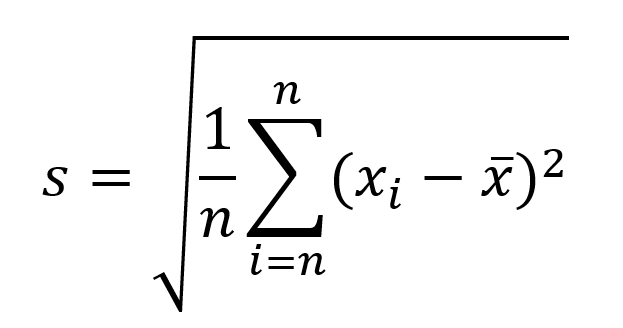

Apesar de o cálculo anterior eliminar o problema dos valores absolutos, cria outro problema, distorcendo os dados, pois ficam ao quadrado e perdem a proporção inicial. Uma forma de resolver isso é ao final fazer a raiz quadrada do resultado, assim desfazendo o valores que foram calculados ao quadrado e retornando a proporção inicial.

In [13]:
df.NU_IDADE.std()

6.630445139150973

Esse resultado faz mais sentido, se olharmos por exemplo para a média que é 21 anos, a variação fica entre 15 e 27 aproximadamente, fazendo um pouco mais de sentido quando olhamos para o boxplot inicial.

In [30]:
print(f'A variação média da idade dos inscritos é de {df.NU_IDADE.std()}')  

A variação média da idade dos inscritos é de 6.630445139150973


**Coeficiente de Variação (Coefficient of Variation)**
<br>
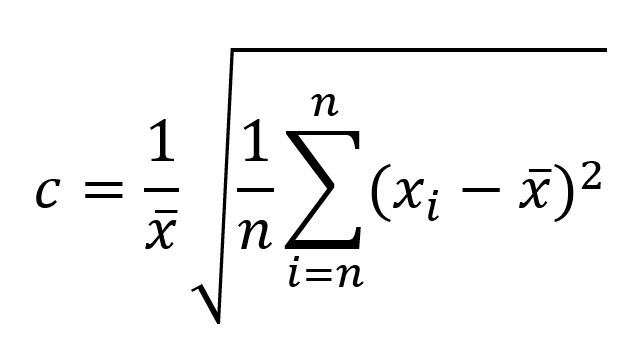

Apesar de o cálculo anterior não ter criado nenhum problema, ele ainda pode trazer resultados similares em situações muito diferentes, então esse cálculo pega o resultado da fórmula anterior e divide pela média, assim o resultado fica em função da média e é possível diferenciar melhor algumas situações.

In [18]:
variation(df.NU_IDADE)

0.3084838895587977

In [27]:
print(f'A variação média da idade dos inscritos em relação à média é de {round(variation(df.NU_IDADE)*100,1)}%')  

A variação em relação à média é de 30.8%


Nesse caso dos inscritos no Enem, 30% da média que é 21 fica em torno de 6.4, não muito diferente do que calculamos no Desvio Padrão.
<br><br>
É possível perceber que diferente do cálculo de amplitude, nos demais cálculos não precisamos nos preocupar com os outliers, pois não influenciaram muito nos resultados.